In [60]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [61]:
penguins = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')

In [62]:
penguins.head()

,Region,Stage,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,Anvers,"Adult, 1 Egg Stage",N1A1,39.1,18.7,181.0,3750.0,NaN,NaN,Not enough blood for isotopes.
1,Anvers,"Adult, 1 Egg Stage",N1A2,39.5,17.4,186.0,3800.0,8.94956,-24.69454,NaN
2,Anvers,"Adult, 1 Egg Stage",N2A1,40.3,18.0,195.0,3250.0,8.36821,-25.33302,NaN
3,Anvers,"Adult, 1 Egg Stage",N2A2,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,Anvers,"Adult, 1 Egg Stage",N3A1,36.7,19.3,193.0,3450.0,8.76651,-25.32426,NaN


In [63]:
#renaming the columns so to remove spaces. Makes calling these columns more manageable going forwards
penguins.rename(columns={'Individual ID':'IndividualID','Culmen Length (mm)':'CulmenLength','Culmen Depth (mm)':'CulmenDepth','Flipper Length (mm)':'FlipperLength','Body Mass (g)':'BodyMass','Delta 15 N (o/oo)':'Delta15N','Delta 13 C (o/oo)':'Delta13C'}, inplace=True)  

In [64]:
#removing all categorical columns. This is because DBScan can only work with numeric data
penguins.drop(['Region','Stage','IndividualID','Comments'], axis=1, inplace=True)

In [65]:
penguins.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Delta15N,Delta13C
count,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [66]:
#there are two rows in the dataset that are almost all NA values. This code removes them
penguins.dropna(axis=0, thresh=4, inplace=True)

In [67]:
#for the remaining NAs, it seems reasonable to replace them with the mean values for their respective columns
impute_mean = SimpleImputer(strategy='mean')
penguins2 = pd.DataFrame(impute_mean.fit_transform(penguins))

In [68]:
penguins2.columns = penguins.columns
penguins=penguins2

In [69]:
penguins.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Delta15N,Delta13C
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,5.459584,1.974793,14.061714,801.954536,0.541975,0.781050
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.225000,15.600000,190.000000,3550.000000,8.305905,-26.295280
50%,44.450000,17.300000,197.000000,4050.000000,8.681410,-25.795390
75%,48.500000,18.700000,213.000000,4750.000000,9.141270,-25.081043
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


In [70]:
#here the data is standardized. By transforming the column values into their Z-scores, the entire dataset can be grouped more smoothly.
ss = StandardScaler()
z_penguins = ss.fit_transform(penguins)
z_penguins = pd.DataFrame(z_penguins, columns=penguins.columns.tolist())

In [71]:
z_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Delta15N       342 non-null    float64
 5   Delta13C       342 non-null    float64
dtypes: float64(6)
memory usage: 16.2 KB


In [72]:
z_penguins.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Delta15N,Delta13C
0,-0.884499,0.785449,-1.418347,-0.564142,0.000000,0.000000
1,-0.811126,0.126188,-1.062250,-0.501703,0.399456,1.271627
2,-0.664380,0.430462,-0.421277,-1.188532,-0.674767,0.452966
3,-1.324737,1.089724,-0.563715,-0.938776,0.061215,0.464198
4,-0.847812,1.748985,-0.777373,-0.689020,-0.126430,0.497804


In [73]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn import metrics
from sklearn import manifold

In [74]:
#In order to find the best epsilon value, we created a K-Distance graph and located the point of maximum curvature on the Y-Axis.
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(z_penguins)
distances, indices = nbrs.kneighbors(z_penguins)

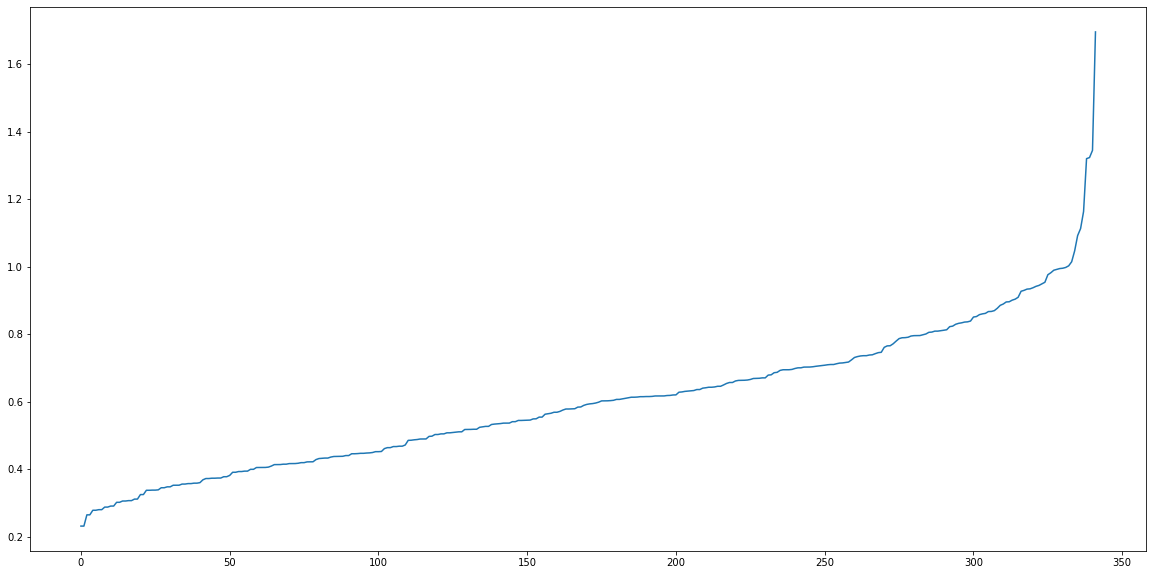

In [75]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
#plt.xlabel()
#plt.ylabel()
plt.plot(distances)
plt.show()
#Based on the graph, a value of 1.0 is likely a reasonable value for epsiolon in the DBScan.

In [76]:
#In order to find the best value for minPts, we tested a range of values on the DBScan model and examining the model's silhouette value.
#A silhouette value measures the strength of individual clusters from a scale of -1 to 1. If the value is close to 0 this indicates issues of overlapping values.
silhouettes = []
for mins in range(1,31):
    dbscan = DBSCAN(eps=1,min_samples=mins).fit(z_penguins)
    labels = dbscan.labels_
    silhouettes.append(metrics.silhouette_score(z_penguins, labels))

In [77]:
silhouettes

[-0.040026330918482685,
 0.09934648619937088,
 0.1607493079910759,
 0.30237606387262406,
 0.31787900269748764,
 0.31035794576750325,
 0.29335771895275564,
 0.3690620876599879,
 0.36197865637648713,
 0.341782627736841,
 0.33254938245088234,
 0.3276766784454928,
 0.3043852742088732,
 0.29318323917436456,
 0.27553911494874445,
 0.24953378349432626,
 0.18977723607771285,
 0.12861258587536437,
 0.13475957708480593,
 0.0804305382739311,
 0.12086070111342345,
 0.10182862527314687,
 0.10182862527314687,
 0.08598204441120647,
 0.03756007767739538,
 0.016828111690632995,
 -0.01260159950480895,
 -0.055961571082926376,
 -0.1362024308545424,
 0.08007374704700702]

Text(0, 0.5, 'Silhouette Score')

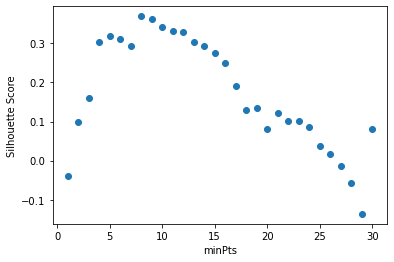

In [78]:
#Here, we graphed the silhouette and minPts values.
#Based on the graph, it would seem a minPts value of 8 would be optimal.
mins = range(1,31)
plt.scatter(x=mins, y=silhouettes)
plt.xlabel('minPts')
plt.ylabel('Silhouette Score')

In [79]:
#Here is the DBScan model so far.
dbscan = DBSCAN(eps=1,min_samples=8).fit(z_penguins)

In [80]:
#After having made a basic DPScan model with tuned hyperparameters, we wanted to further test the model.
#While Silhouette scores are a good way of measuring the strength of clusters in a classification model,
# Silhouette scores are less accurate when used on data that is in many dimensions.

In [81]:
#In order to ammend this, we assesed our model, again, using a method borrowed from tushar-joshi-89.medium.com.
#We falsely understood this method to be a way of further improving the accuracy of the Silhouette score, however it generated a value based on false presumptions.
#With this method, we created a new column for our dataframe that calculated each row's raw-distance from the center of the plot.
#By creating a silhouette score using this 'Z' row and the DBScan's labels, we attempted to reduce the issue of dimensionality in the silhouette score.
z_penguins['Z'] = z_penguins.apply(lambda row: np.linalg.norm([0,0,0,0,0,0] - row[[0,1,2,3,4,5]]), axis=1)
metrics.silhouette_score(z_penguins[['Z']], dbscan.labels_)

0.019289640843070575

In [82]:
#The silhouette score was very close to zero, indicating overlap in our DBScan model's clusters

In [83]:
i = [(0,1),(0,2),(0,3),(0,4),(0,5),(1,2),(1,3),(1,4),(1,5),(2,3),(2,4),(2,5),(3,4),(3,5),(4,5)]

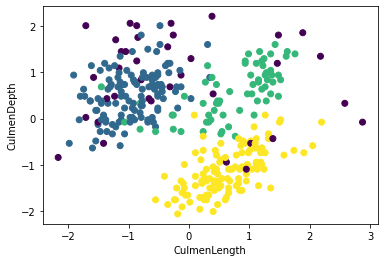

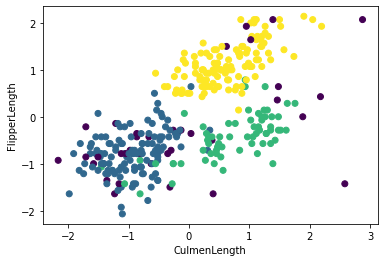

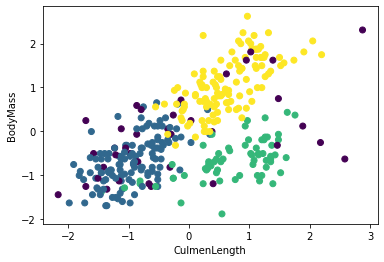

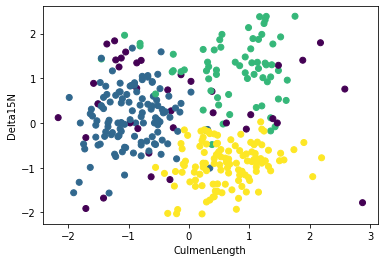

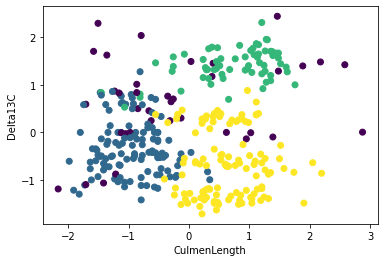

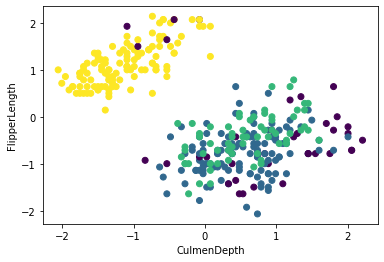

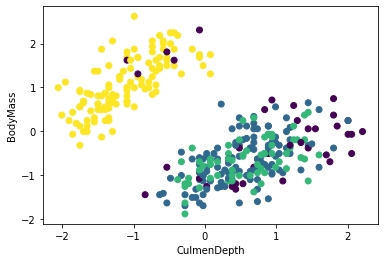

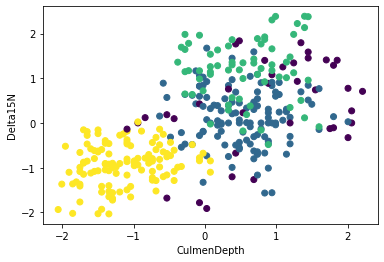

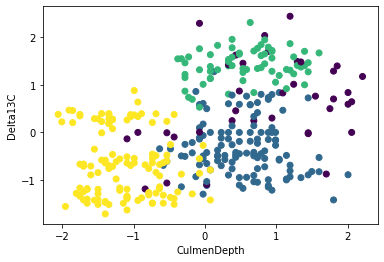

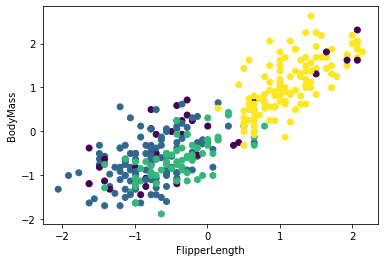

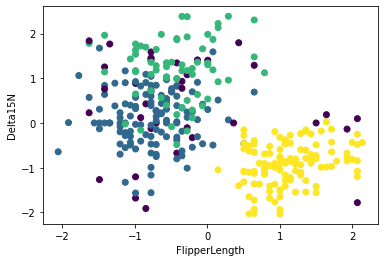

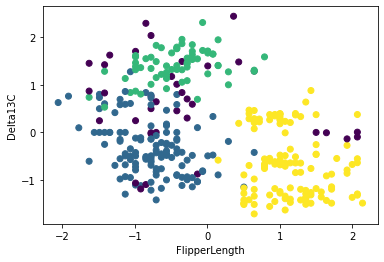

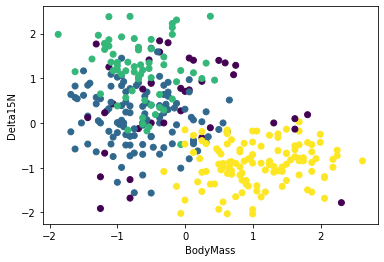

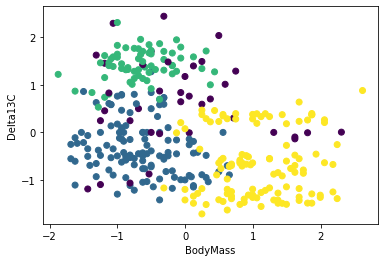

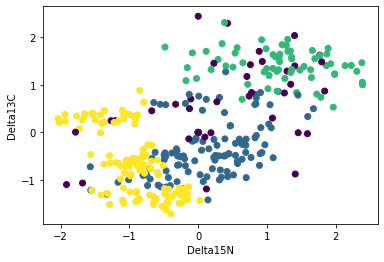

In [84]:
#To examine this issue in the data, we graphed our DBScan dataframe on every column combination
for tupl in range(0,len(i)):
    plt.scatter(z_penguins[z_penguins.columns[i[tupl][0]]], z_penguins[z_penguins.columns[i[tupl][1]]], c=dbscan.labels_)
    plt.xlabel(z_penguins.columns[i[tupl][0]])
    plt.ylabel(z_penguins.columns[i[tupl][1]])
    plt.show()

In [85]:
#Notice that, while the clusters frequently occupied distinct domains, there were several variable combinations where two clusters overlaped.
#This was likely the reason for the low silhouette score.

#We next attempted to reduce the dimensionality of dataset in order to see if the distance based silouette score could be improved.

In [86]:
z_filtered = z_penguins.copy()
z_filtered.drop(columns=['BodyMass','Z'], axis=1, inplace=True)
dbscan2 = DBSCAN(eps=1,min_samples=8).fit(z_filtered)
z_filtered['Z'] = z_filtered.apply(lambda row: np.linalg.norm([0,0,0,0,0] - row[list(z_filtered.columns)]), axis=1)
metrics.silhouette_score(z_filtered[['Z']], dbscan2.labels_)

-0.008943505331688103

In [87]:
z_filtered = z_penguins.copy()
z_filtered.drop(columns=['BodyMass','FlipperLength','Z'], axis=1, inplace=True)
dbscan2 = DBSCAN(eps=1,min_samples=8).fit(z_filtered)
z_filtered['Z'] = z_filtered.apply(lambda row: np.linalg.norm([0,0,0,0] - row[list(z_filtered.columns)]), axis=1)
metrics.silhouette_score(z_filtered[['Z']], dbscan2.labels_)

-0.08419131677891914

In [88]:
z_filtered = z_penguins.copy()
z_filtered.drop(columns=['BodyMass','CulmenDepth','FlipperLength','Z'], axis=1, inplace=True)
dbscan2 = DBSCAN(eps=1,min_samples=8).fit(z_filtered)
z_filtered['Z'] = z_filtered.apply(lambda row: np.linalg.norm([0,0,0] - row[list(z_filtered.columns)]), axis=1)
metrics.silhouette_score(z_filtered[['Z']], dbscan2.labels_)

0.5007051515698054

In [89]:
z_filtered.columns

Index(['CulmenLength', 'Delta15N', 'Delta13C', 'Z'], dtype='object')

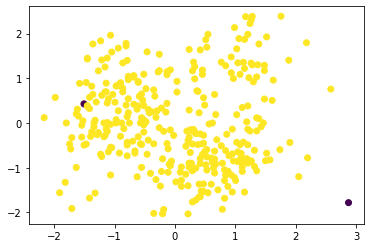

In [90]:
plt.scatter(z_filtered['CulmenLength'], z_filtered['Delta15N'], c=dbscan2.labels_)

In [91]:
#After reducing our columns by three, we were able to achieve a distance-based Silouette score of 0.5, a marked improvement, theoretically.
#However the supposed improvement was due to the reduction in clusters to 1, and at the expense of multiple variables of data.
#This lead us to conclude that the distance formula hurt rather then aided the building of the DBScan model, as it also conflicted with domain knowledge regarding to the dataset.
#By this point, through research, we had come to learn that the data was observing three distinct species of penguin.
#Therefore, if we were hoping to classify the data accurately, we would expect to yield three clusters of data, not one.
#Rather then yielding a more accurate Silhouette score, the distance based formula produced a score
#that was much more senitive to dimensionality.


In [92]:
#Rather then simply disregard the silhouette scores, we decided to use another method of tuning the hyperparameters
#(in addition to, not instead of, the silhouette scores)
z_penguins.columns
z_penguins.drop(columns=['Z'], axis=1, inplace=True)

In [94]:
#With this method, we print the value counts for dbscan labels testing several different min_samples values
for min_s in range(50):
    print(f'epsilon: 1, min_samples: {min_s}')
    dbscan=DBSCAN(eps=1, min_samples=min_s).fit(z_penguins) 
    df_result = pd.DataFrame(dbscan.labels_)
    print(df_result.value_counts())

epsilon: 1, min_samples: 0
0     205
12    122
1       3
6       2
2       1
3       1
4       1
5       1
7       1
8       1
9       1
10      1
11      1
13      1
dtype: int64
epsilon: 1, min_samples: 1
0     205
12    122
1       3
6       2
2       1
3       1
4       1
5       1
7       1
8       1
9       1
10      1
11      1
13      1
dtype: int64
epsilon: 1, min_samples: 2
 0    205
 3    122
-1     10
 1      3
 2      2
dtype: int64
epsilon: 1, min_samples: 3
 0    205
 2    122
-1     12
 1      3
dtype: int64
epsilon: 1, min_samples: 4
 0    205
 1    122
-1     15
dtype: int64
epsilon: 1, min_samples: 5
 0    201
 1    119
-1     22
dtype: int64
epsilon: 1, min_samples: 6
 0    196
 1    119
-1     27
dtype: int64
epsilon: 1, min_samples: 7
 0    190
 1    119
-1     33
dtype: int64
epsilon: 1, min_samples: 8
 0    121
 2    118
 1     66
-1     37
dtype: int64
epsilon: 1, min_samples: 9
 2    118
 0    115
 1     63
-1     46
dtype: int64
epsilon: 1, min_samples: 10
 2

In [ ]:
#Due to our domain knowledge, we know the desired number of clusters is 3.
#By looking for the min_samples value that gets us 3 clusters and the least amount of outliers, we are able to find a stuitable
# min_samples value. And this value is 8, the same value determined using the Silhouette score method.
#Now we have two pieces of evidence that support our hyperparameter tuning.
#We can now conclude that our DBScan model is optimized.